<a href="https://colab.research.google.com/github/kapilgupta86/DO180-apps/blob/master/DLproject_advertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Column Description
id Unique id for each row.
relationship_status The relationship status of the most responsive customers to the advertisement.
industry The industry to which the product belonged.
genre The type of advertisement.
targeted_sex Sex that was mainly targeted for the advertisement.
averageruntime(minutesper_week) Minutes per week the advertisement was aired.
airtime Time when the advertisement was aired.
airlocation Country of origin.
ratings Metric out of 1 which represents how much of the targeted demographic watched the advertisement.
expensive A general measure of how expensive the product or service is that the ad is discussing.
moneybackguarantee Whether or not the product offers a refund in the case of customer dissatisfaction.
netgain Whether the ad will incur a gain or not when sold.
[target]

Objective 
This dataset is intended for binary classification tasks.
Use this data set to train a model able to classify whether an ad will be profitable or not.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
csv1=pd.read_csv('/content/drive/My Drive/INSAID/DL_project/advertisement_success.csv') 
csv1.shape

(26048, 12)

In [34]:
csv1.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [14]:
csv1.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [15]:
print(csv1.isnull().sum())

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64


In [16]:
csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [ ]:
#!pip install pandas-profiling --upgrade
import pandas_profiling
profile = csv1.profile_report(title='advertisement_preprocessing')
profile.to_file(output_file="/content/drive/My Drive/INSAID/DL_project/advertisement_preprocessing.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Encoding netgain to 0/1
csv1['netgain'] = csv1['netgain'].apply(lambda x: 1 if x else 0) 
csv1.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,0
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,0
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,0
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,0
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,1


In [ ]:
### one hot encoading  for categorical column 

In [18]:
data= pd.get_dummies(csv1, columns=['realtionship_status', 'industry', 'genre', 'targeted_sex', 'airtime', 'airlocation', 'expensive', 'money_back_guarantee'], drop_first=True)

In [19]:
data.head()

,id,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,19717,45,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,31593,45,0.027465,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,5681,45,0.027465,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,15491,40,0.027465,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,23587,48,0.027465,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [20]:
data.shape

(26048, 66)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#droping ID (All unique value)and netgain(target value) from X(input)
X = data.drop(['id', 'netgain'], axis=1)
y = data['netgain']

# Before passing data to neural network it must be standardized
scaling = StandardScaler()
scaling.fit(X)
X = scaling.transform(X)
# Saling convert X in to numpy arry



In [22]:
X


array([[ 0.37709809, -0.14832981, -0.02701768, ..., -1.23105636,
        -0.36592642, -1.00376939],
       [ 0.37709809, -0.14832981, -0.02701768, ...,  0.81231049,
        -0.36592642, -1.00376939],
       [ 0.37709809, -0.14832981, -0.02701768, ..., -1.23105636,
        -0.36592642,  0.99624477],
       ...,
       [-1.22556648,  0.83741885, -0.02701768, ...,  0.81231049,
        -0.36592642, -1.00376939],
       [ 0.61749777, -0.14832981, -0.02701768, ...,  0.81231049,
        -0.36592642,  0.99624477],
       [-0.02356805, -0.14832981, -0.02701768, ...,  0.81231049,
        -0.36592642,  0.99624477]])

In [23]:
y
# Y is still dataframe 

0        0
1        0
2        0
3        0
4        1
        ..
26043    1
26044    0
26045    1
26046    0
26047    0
Name: netgain, Length: 26048, dtype: int64

In [24]:
#Startify since we have imbalanced dataset 
X_train_full, X_test, y_train_full, y_test = train_test_split(X, np.array(y), random_state=42, stratify=np.array(y))
# here np.array(y) is used to convert dataframe to array as X is also array
num_input_nodes = X_train_full.shape[1]

In [25]:
y_train_full.shape


(19536,)

In [26]:
X_train_full.shape

(19536, 64)

In [27]:
y_test.shape

(6512,)

In [28]:
model = keras.models.Sequential()
#model.add(layers.Dense(64, kernel_initializer='uniform', input_shape=(x_train.shape[1],))
model.add(keras.layers.Flatten(input_shape=(X_train_full.shape[1],)))
model.add(keras.layers.Dense(10, activation="relu"))
model.add(keras.layers.Dense(5, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))





In [29]:
model.summary()
model.layers
model.layers[1].name

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 711
Trainable params: 711
Non-trainable params: 0
_________________________________________________________________


'dense'

In [ ]:
#weights, biases = model.layers[1].get_weights()
#weights.shape
#biases

In [30]:
model.compile(loss="mse",
optimizer="adam",
metrics=["accuracy"])

In [31]:
#X_train_full, X_test, y_train_full, y_test
#history = model.fit(X_train_full, y_train_full, epochs=30, validation_data=(x_valid, y_valid))
history = model.fit(X_train_full, y_train_full, epochs=30, validation_split=0.2)



Epoch 1/30
489/489 [==============================] - 2s 2ms/step - loss: 0.1635 - accuracy: 0.7616 - val_loss: 0.1329 - val_accuracy: 0.7943
Epoch 2/30
489/489 [==============================] - 1s 1ms/step - loss: 0.1320 - accuracy: 0.7994 - val_loss: 0.1282 - val_accuracy: 0.7986
Epoch 3/30
489/489 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.7988 - val_loss: 0.1262 - val_accuracy: 0.8009
Epoch 4/30
489/489 [==============================] - 1s 1ms/step - loss: 0.1227 - accuracy: 0.8064 - val_loss: 0.1248 - val_accuracy: 0.8030
Epoch 5/30
489/489 [==============================] - 1s 1ms/step - loss: 0.1246 - accuracy: 0.8034 - val_loss: 0.1241 - val_accuracy: 0.8055
Epoch 6/30
489/489 [==============================] - 1s 1ms/step - loss: 0.1216 - accuracy: 0.8103 - val_loss: 0.1239 - val_accuracy: 0.8066
Epoch 7/30
489/489 [==============================] - 1s 2ms/step - loss: 0.1225 - accuracy: 0.8071 - val_loss: 0.1235 - val_accuracy: 0.8053
Epoch 

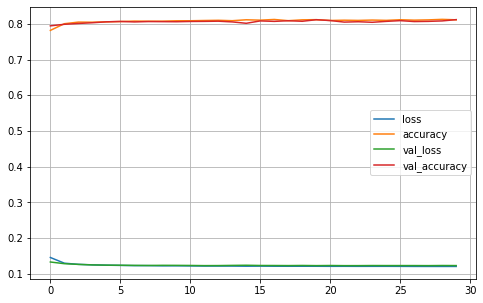

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
### Fine-Tuning Neural Network Hyperparameters

In [33]:
num_input_nodes

64

In [97]:
def build_model(n_hidden=3, n_neurons=30, learning_rate=3e-3, input_shape=num_input_nodes):
  model = keras.models.Sequential()
  options = {"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    options = {}
  model.add(keras.layers.Dense(1, **options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [ ]:
##The KerasRegressor object is a thin wrapper around the Keras model built using
build_model(). Since we did not specify any hyperparameter when creating it, it will
just use the default hyperparameters we defined in build_model(). Now we can use
this object like a regular Scikit-Learn regressor: we can train it using its fit()
method, then evaluate it using its score() method, and use it to make predictions
using its predict() method. Note that any extra parameter you pass to the fit()
method will simply get passed to the underlying Keras model. Also note that the
score will be the opposite of the MSE because Scikit-Learn wants scores, not losses
(i.e., higher should be better).

In [98]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [99]:
#keras_reg.fit(X_train, y_train, epochs=100,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
keras_reg.fit(X_train_full, y_train_full, epochs=100, validation_split=0.2 ,callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
#y_pred = keras_reg.predict(X_new)
#validation_split=0.2

TypeError: ignored

In [104]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
 "n_hidden": [0, 1, 2, 3],
 "n_neurons": np.arange(1, 100),
 "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_full, y_train_full, epochs=100,validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


RuntimeError: ignored

In [34]:
pip install keras-tuner

In [41]:
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization

In [42]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(
                units=hp.Int('units', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape,
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        
        model.add(
            layers.Dense(
                units=hp.Int('units', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                kernel_initializer='zeros', bias_initializer='zeros'
            )
        )
        
        model.add(
            layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(layers.Dense(1, kernel_initializer='zeros', bias_initializer='zeros'))
        
        model.compile(
            optimizer='rmsprop',loss='mse',metrics=['mse']
        )
        
        return model

In [43]:
input_shape = (X_train_full.shape[1],)
hypermodel = RegressionHyperModel(input_shape)

In [47]:
#Build Random Search Tuner
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
tuner_rs = RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2, overwrite=True
        )

In [50]:
#Run Random Search
tuner_rs.search(X_train_full, y_train_full, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [53]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
mse_rs = best_model.evaluate(X_test, y_test)[1]

204/204 [==============================] - 0s 980us/step - loss: 0.1267 - mse: 0.1267


In [54]:
print('Random search MSE: ', mse_rs)

Random search MSE:  0.12735454738140106


In [55]:
#Build Random Search Tuner
tuner_rs = RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2, overwrite=True
        )

In [ ]:
Run Random Search

In [57]:
tuner_rs.search(X_train_full, y_train_full, epochs=10, validation_split=0.2, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [61]:
#Evaluate Random Search
best_model = tuner_rs.get_best_models(num_models=1)[0]
mse_rs = best_model.evaluate(x_test_scaled, y_test)[1]

NameError: ignored

In [62]:
print('Random search MSE: ', mse_rs)

Random search MSE:  0.12735454738140106


In [ ]:
#Build, Run and Evaluate Hyperband Tuner¶

In [60]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='mse',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )

tuner_hb.search(X_train_full, y_train_full, epochs=10, validation_split=0.2, verbose=0)

best_model = tuner_hb.get_best_models(num_models=1)[0]
mse_hb = best_model.evaluate(X_test, y_test)[1]

INFO:tensorflow:Oracle triggered exit
204/204 [==============================] - 0s 907us/step - loss: 0.1331 - mse: 0.1331


In [63]:
print('Hyperband MSE: ', mse_hb)

Hyperband MSE:  0.13330279290676117


In [ ]:
#Build, Run and Evaluate Bayesian Optimization Tuner
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='mse',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

tuner_bo.search(X_train_full, y_train_full, epochs=10, validation_split=0.2, verbose=0)

best_model = tuner_bo.get_best_models(num_models=1)[0]
mse_bo = best_model.evaluate(X_test, y_test)[1]

In [ ]:
print('Bayesian Optimization MSE: ', mse_bo)